<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/text_cluster_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.09 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Visualization for Text Clusters**

Before visualizing text clusters, see how to get the clustering results from
[hierarchical clustering](https://github.com/angel870326/Hierarchical-Clustering/blob/main/hierarchical_clustering_text.ipynb) in details, or you can use [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

<br/>

####**Contents:**

1. Read file with clustering results
2. Tf-idf vectorizer
3. Cosine similarity & distance
4. Dimension Reduction with PCA
5. Scatter Plot

<br/>

In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**1. Read file with clustering results**


---



In [ ]:
import numpy as np
import pandas as pd

cluster_result = pd.read_csv('/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/hierarchical_textcluster.csv')

#**2. Tf-idf vectorizer**


---



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# text contents in dataframe to array
contents = np.array(cluster_result['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer() 
tfidf_matrix = vectorizer.fit_transform(contents)

# See all terms
terms = vectorizer.get_feature_names_out()
print("Terms: ",terms)

# Store vectorized texts in df
cluster_result['tfidf'] = list(tfidf_matrix.toarray())
cluster_result

Terms:  ['24小時' '一般' '三十一年至三十五年屋齡' '三十六年至四十年屋齡' '中公設比' '二十六年至三十年屋齡' '二十年至二十五年屋齡'
 '五年內屋齡' '六年至十年屋齡' '其他' '其他管理形式' '加強磚造' '十一年至十五年屋齡' '十六年至二十年屋齡' '四十年以上屋齡'
 '多戶數' '多方位' '夜間管理' '大公設比' '小公設比' '少戶數' '新北市' '新竹市' '新竹縣' '日間管理' '有平面車位'
 '有機械車位' '東北' '東南' '桃園市' '極多戶數' '極少戶數' '無平面車位' '無機械車位' '無管理' '磚造' '臨單線道'
 '臨多線道' '臨雙線道' '臺中市' '臺北市' '臺南市' '西北' '西南' '近一年有實價登錄' '近一年無實價登錄' '重點'
 '鋼筋混凝土' '鋼骨' '鋼骨鋼筋混凝土' '鐵筋混凝土' '零公設比' '預鑄' '高雄市']


,Unnamed: 0,c0101,content,tfidf,cluster_complete_3,cluster_complete_5,cluster_avg_3,cluster_avg_6,cluster_ward_3,cluster_ward_4
0,0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄...","[0.18752695929632016, 0.0, 0.474967137800667, ...",3,5,3,6,1,2
1,1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,...","[0.19834062531585014, 0.2482541806418836, 0.0,...",1,1,1,1,1,2
2,2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價...","[0.14704310415879734, 0.0, 0.0, 0.0, 0.0, 0.26...",1,2,1,1,1,2
3,3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,...","[0.0, 0.23457981007404105, 0.0, 0.0, 0.2697681...",1,1,3,5,1,2
4,4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄...","[0.1695757006148546, 0.0, 0.0, 0.0, 0.24408920...",1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
18191,18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多...","[0.20949189482883854, 0.0, 0.0, 0.0, 0.3015450...",1,2,1,2,1,1
18192,18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車...","[0.20885027275118728, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,1,2,1,1
18193,18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有...","[0.228797366870728, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",1,2,1,2,1,1
18194,18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線...","[0.1961306618175806, 0.2454880671609076, 0.0, ...",1,2,1,2,1,1


#**3. Cosine similarity & distance**


---


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print

<function print>

#**4. Dimensionality Reduction with PCA**


---


Another option is multidimentional scaling ([MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)).

In [ ]:
from sklearn.decomposition import PCA

# plot high-dimensional data in a two-dimensional space
pca = PCA(n_components=2) 
scatter_plot_points_tfidf = pca.fit_transform(tfidf_matrix.toarray())
scatter_plot_points_dist = pca.fit_transform(dist)

In [ ]:
print("tfidf: \n", scatter_plot_points_tfidf)
print("distance: \n", scatter_plot_points_dist)

tfidf: 
 [[-0.17806852  0.03641426]
 [-0.07213252  0.01779088]
 [-0.21075995  0.01112508]
 ...
 [ 0.04438661 -0.48506241]
 [-0.00903319 -0.31929673]
 [-0.08619045 -0.1577392 ]]
distance: 
 [[-6.50854048 -0.4501579 ]
 [-4.00675808  2.4933149 ]
 [-5.45505836 -2.68973113]
 ...
 [ 0.50893967 13.97212687]
 [-0.58432355  8.8451765 ]
 [-4.78398765  6.19554621]]


#**5. Scatter Plot**


---



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_tfidfVector(clusterType):
  x_axis = [o[0] for o in scatter_plot_points_tfidf]
  y_axis = [o[1] for o in scatter_plot_points_tfidf]
  plt.subplots(figsize=(8, 6)) # set size
  # plt.title(plotTitle, fontsize=20)
  sns.scatterplot(x=x_axis, y=y_axis, hue=clusterType, data=cluster_result)
  plt.show()

def plot_dist(clusterType):
  x_axis = [o[0] for o in scatter_plot_points_dist]
  y_axis = [o[1] for o in scatter_plot_points_dist]
  plt.subplots(figsize=(8, 6)) # set size
  # plt.title(plotTitle, fontsize=20)
  sns.scatterplot(x=x_axis, y=y_axis, hue=clusterType, data=cluster_result)
  plt.show()

### Complete-link

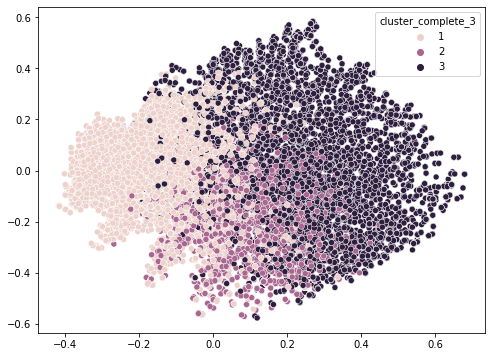

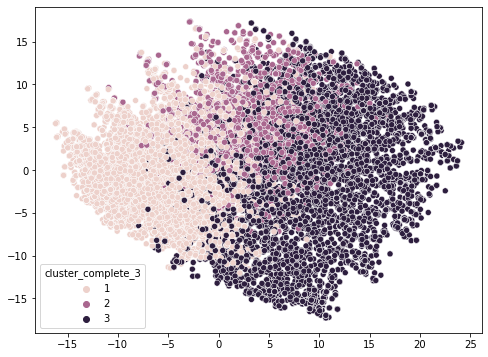

In [ ]:
plot_tfidfVector('cluster_complete_3')
plot_dist('cluster_complete_3')

### Group average

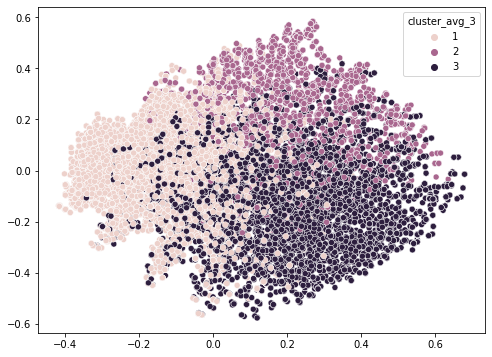

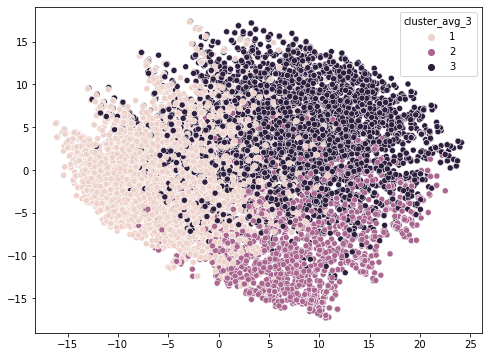

In [ ]:
plot_tfidfVector('cluster_avg_3')
plot_dist('cluster_avg_3')

### Ward

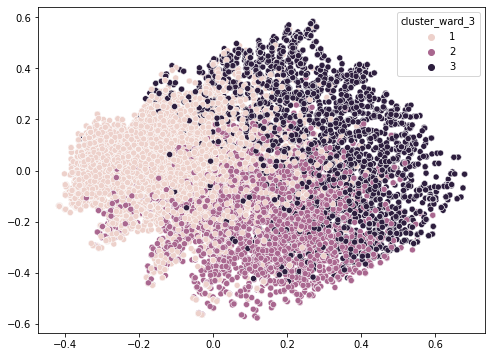

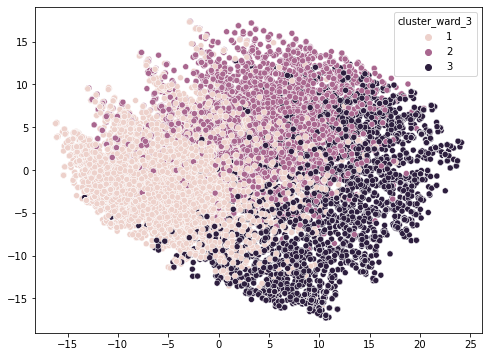

In [ ]:
plot_tfidfVector('cluster_ward_3')
plot_dist('cluster_ward_3')